In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [4]:
bS_dataframe = pd.read_csv('day.csv')

In [5]:
bS_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bS_dataframe.shape

(730, 16)

In [7]:
bS_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bS_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
bS_dataframe.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
#cleaning data here
bS_dataframe['days_old'] = (pd.to_datetime(bS_dataframe['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


In [12]:
bS_dataframe.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed 

In [13]:
# Drop the instant column as it is anindex column which has nothing to do with target
bS_dataframe.drop(['instant'], axis = 1, inplace = True)

# Drop dteday as we already have month and weekday columns to work with
bS_dataframe.drop(['dteday'], axis = 1, inplace = True)

# Drop casual and registered columns as we have cnt column which is sum of the both that is the target column

bS_dataframe.drop(['casual'], axis = 1, inplace = True)
bS_dataframe.drop(['registered'], axis = 1, inplace = True)

In [14]:
bS_dataframe.head

<bound method NDFrame.head of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed

In [15]:
bS_dataframe.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
bS_dataframe.corr

<bound method DataFrame.corr of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspe

In [18]:
bS_dataframe.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

In [19]:
#There are no null values

#Handle outliers
bS_dataframe.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [20]:
#check the number of unique values
bS_dataframe.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

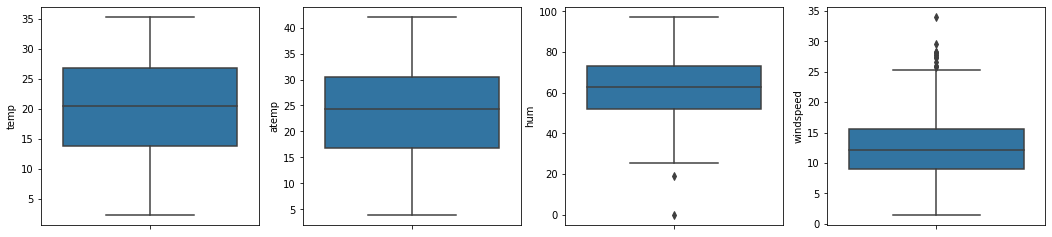

In [21]:
#draw a box plot for independent variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bS_dataframe)
    i+=1

In [22]:
#Converting season and weather sit to categorial variables

bS_dataframe.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bS_dataframe.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bS_dataframe.mnth = bS_dataframe.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bS_dataframe.weekday = bS_dataframe.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bS_dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

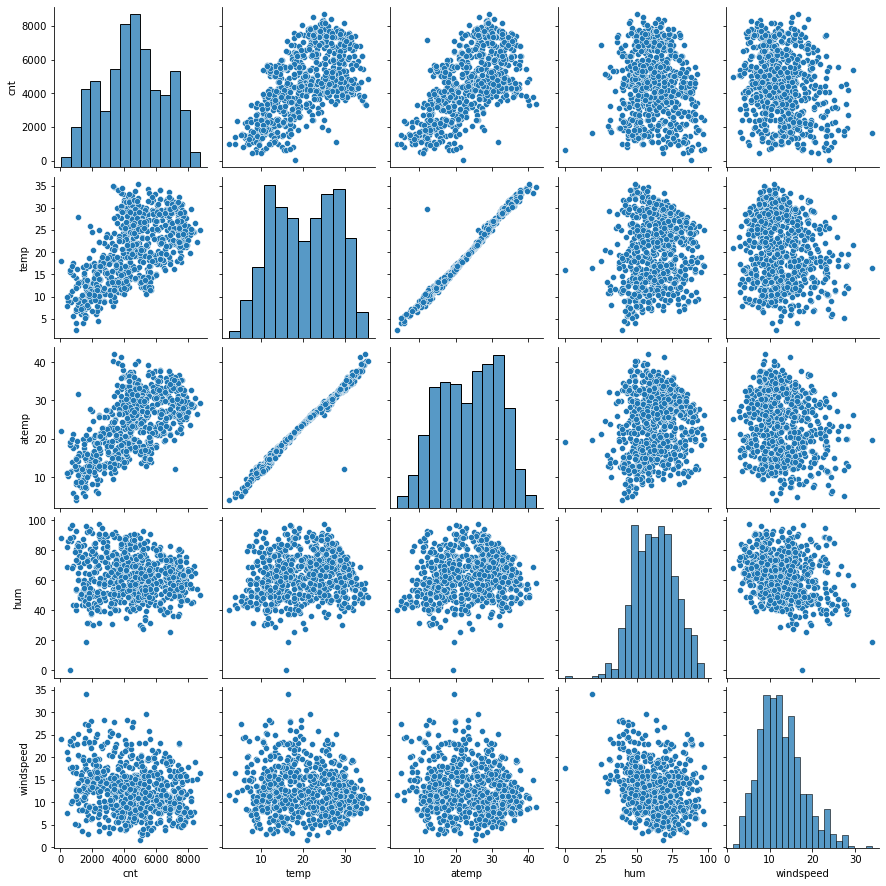

In [23]:
#draw pair plots for continues variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bS_dataframe,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 1440x1080 with 0 Axes>

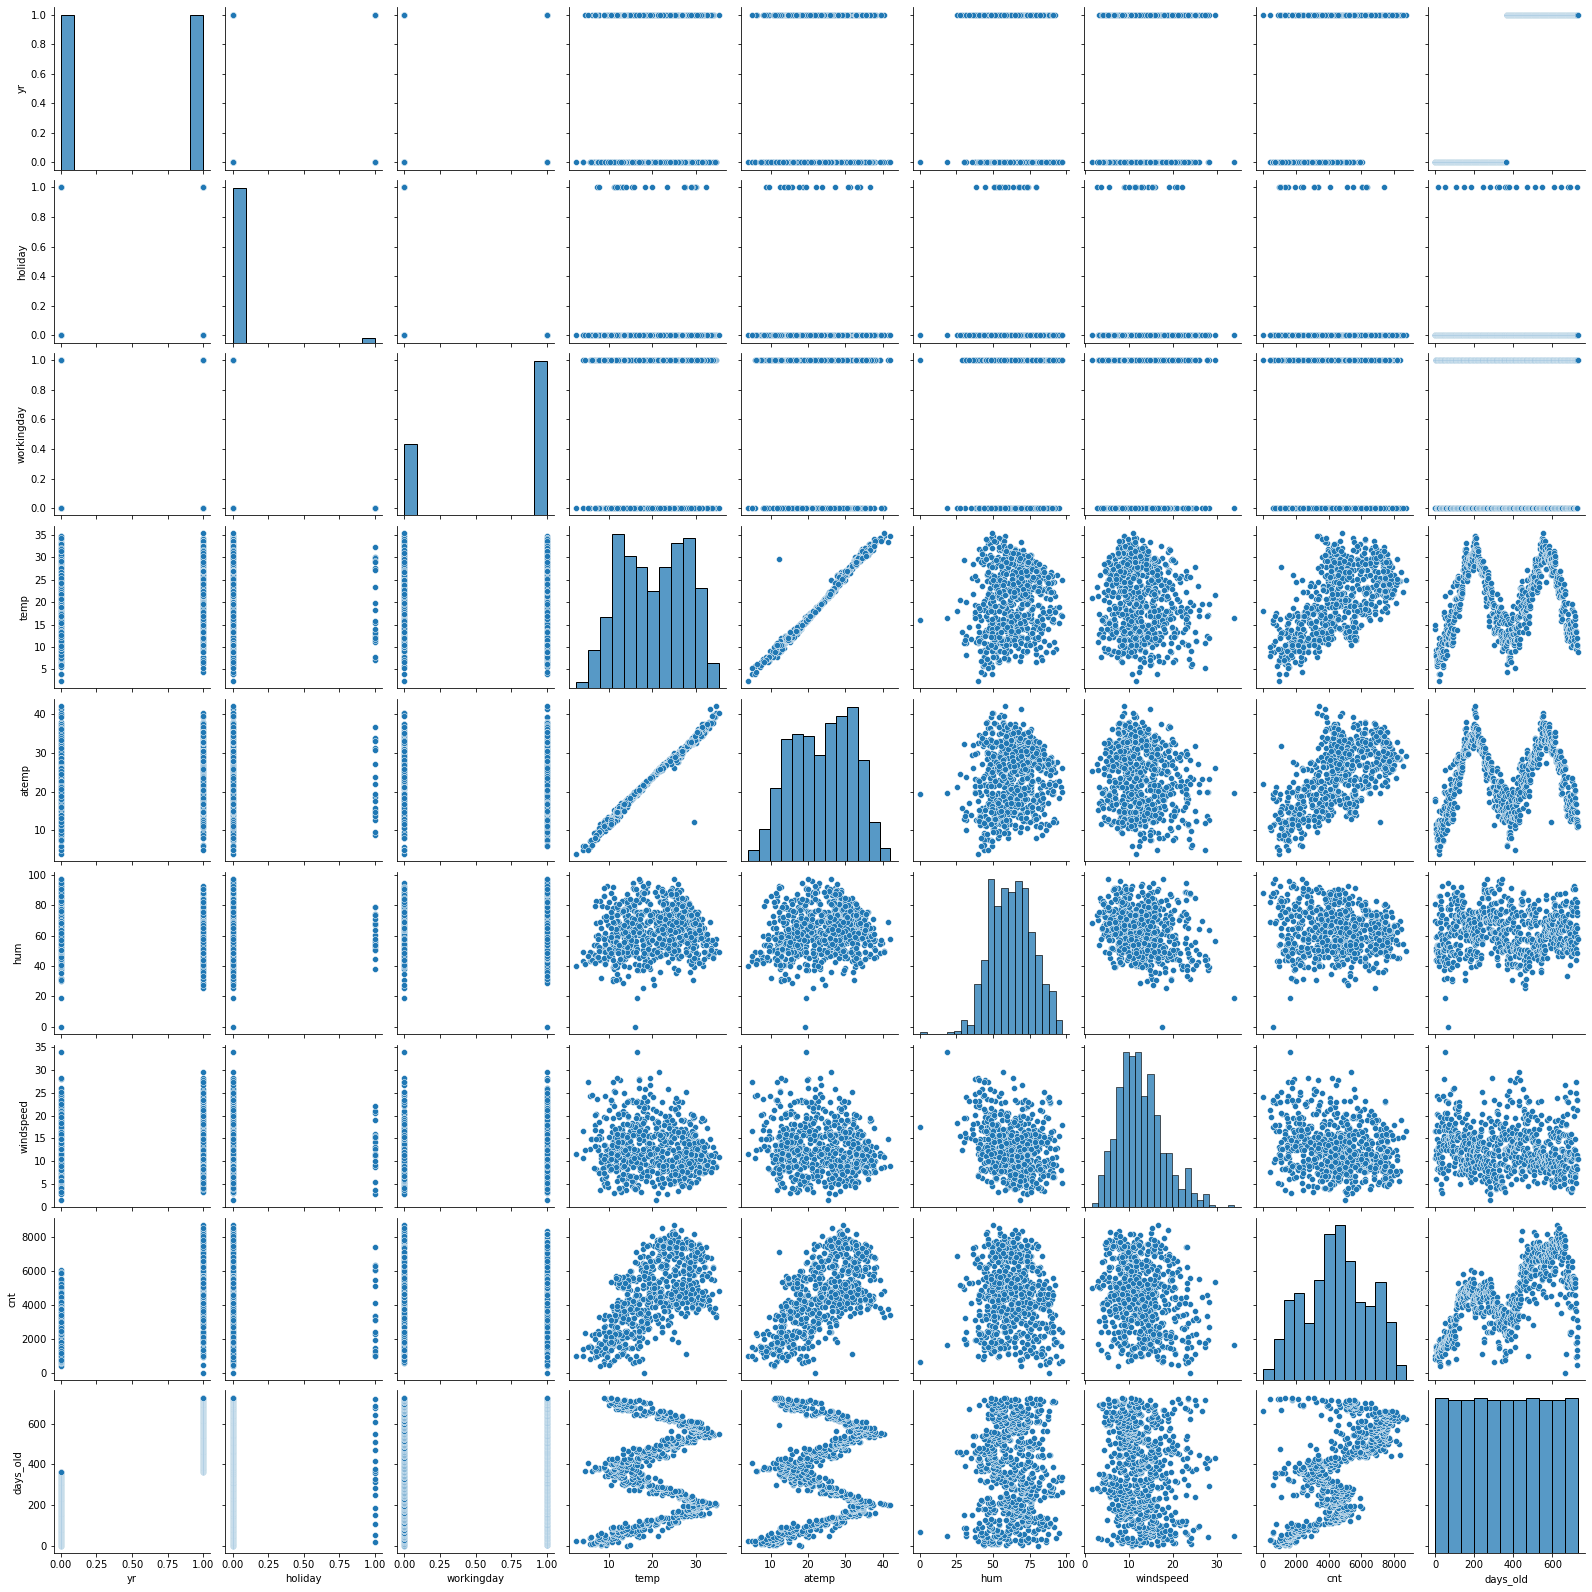

In [24]:
#Visualise Data to Find Correlation between Numerical Variable
plt.figure(figsize=(20,15))
sns.pairplot(bS_dataframe)
plt.show()


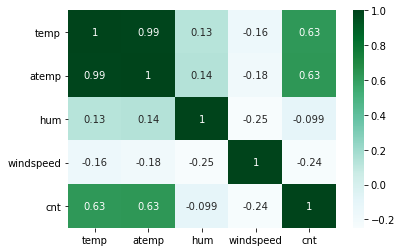

In [25]:
#checking continues variable relationship
sns.heatmap(bS_dataframe[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

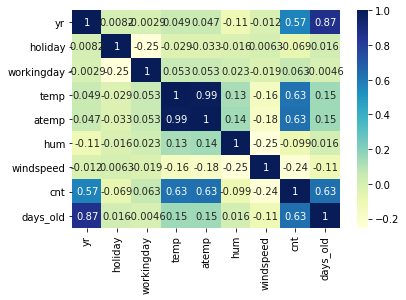

In [26]:
cor=bS_dataframe.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

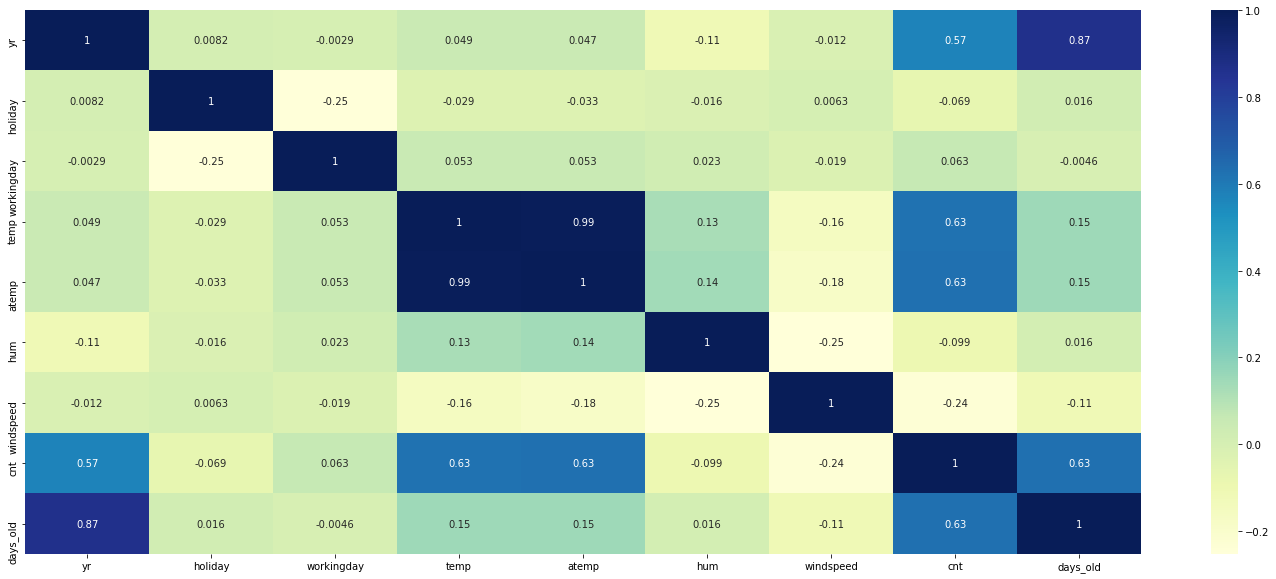

In [27]:
#drawing a heat map
corr = bS_dataframe.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

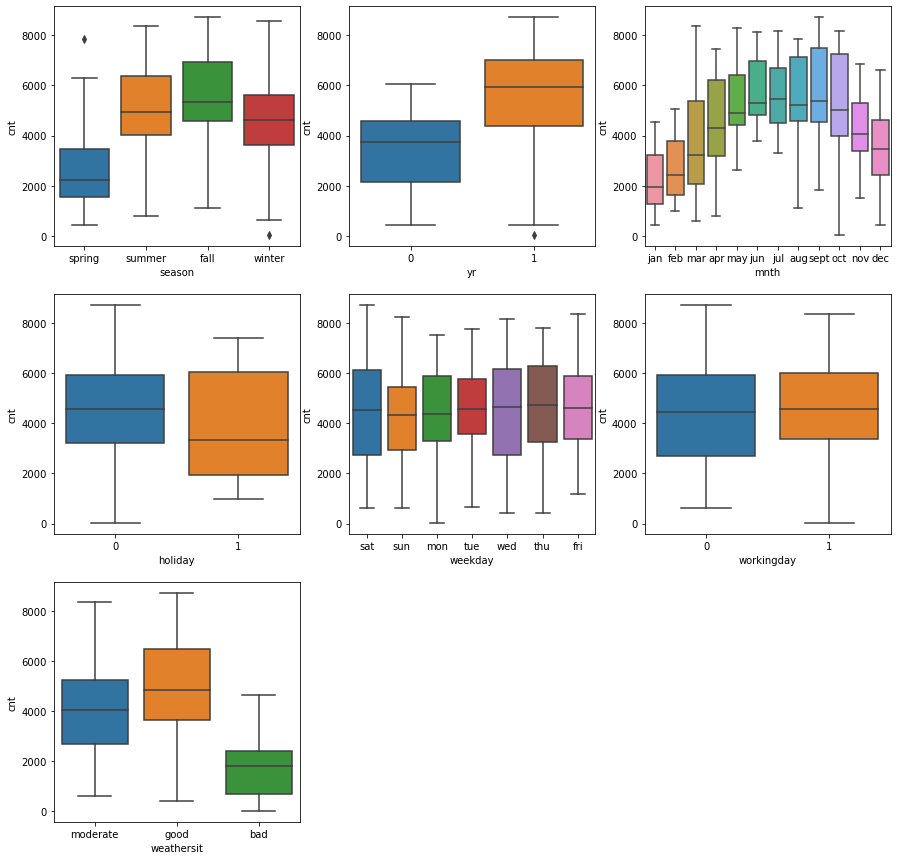

In [28]:
#Analyse categorial variables with target variables

vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bS_dataframe, x=i[1], y='cnt')
plt.show()

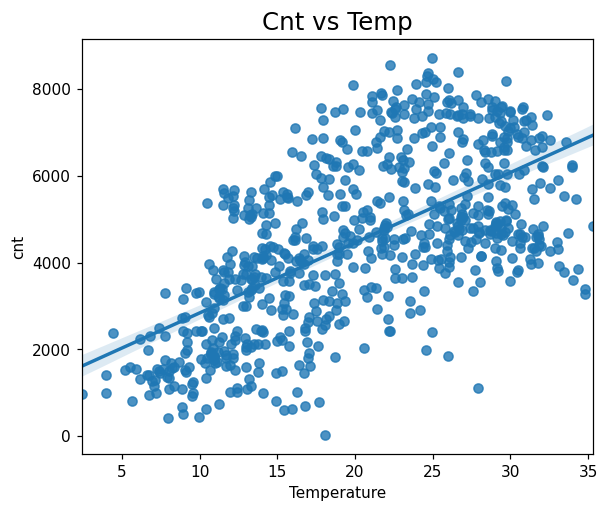

In [29]:
#Inferences
#fall season has highest demand for bikes
#demand for year 1 has increased
#Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
#Demand decreased during holidays
# weekdays does not have a clear picture on demand
# During September, bike sharing is more.

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bS_dataframe,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

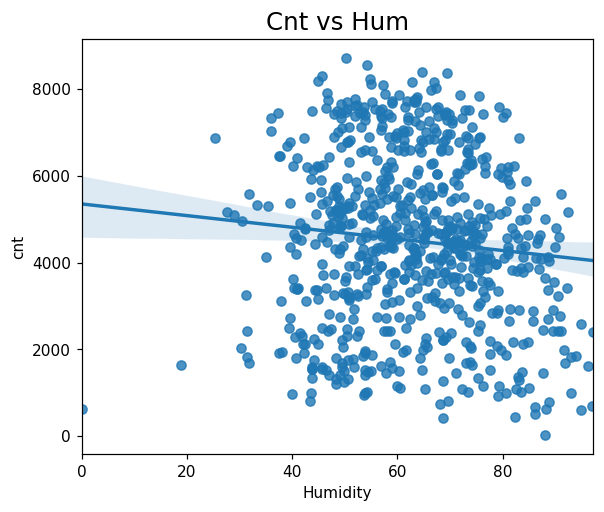

In [30]:
# Demand for bikes are related to temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bS_dataframe,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

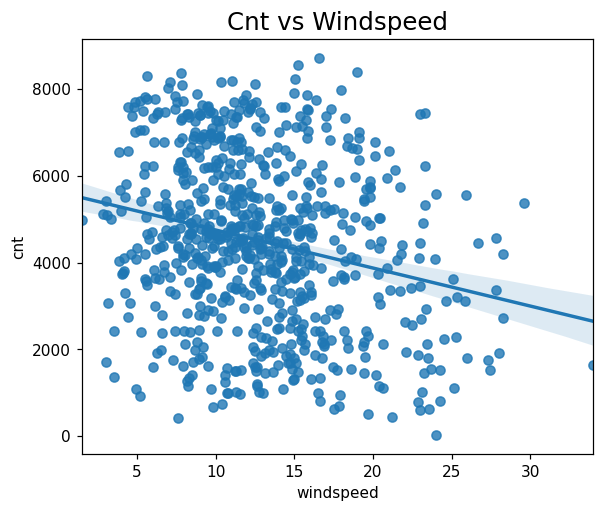

In [31]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bS_dataframe,y="cnt",x="windspeed")
plt.show()

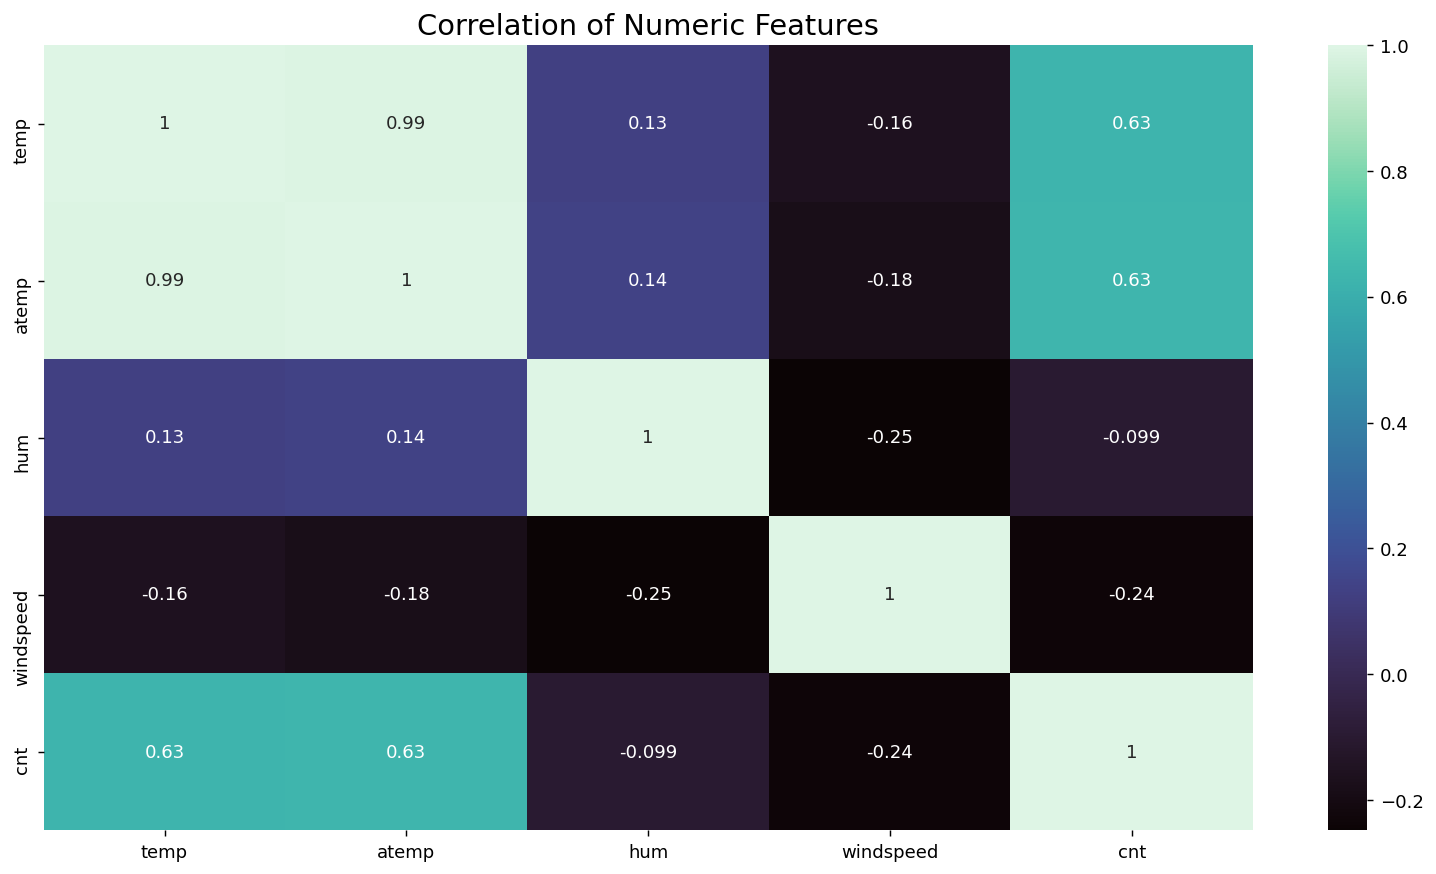

In [32]:
# checking correlation of numeric values
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of Numeric Features",fontsize=16)
sns.heatmap(bS_dataframe[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [33]:
bS_dataframe.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [34]:
bS_dataframe = pd.get_dummies(data=bS_dataframe,columns=["season","mnth","weekday"],drop_first=True)
bS_dataframe = pd.get_dummies(data=bS_dataframe,columns=["weathersit"])

In [35]:
bS_dataframe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [36]:
#building a model
y=bS_dataframe.pop('cnt')

#X is all remainign variable also our independent variables
X=bS_dataframe

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [38]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [39]:
# scalingcontinus variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaling
scaler = MinMaxScaler()

#fit, transform training set 
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
#inspect the stats from scaled training set
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,0,1


In [41]:
#building a linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#reducing the number of features
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
#columns for RFT and weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 10),
 ('mnth_jan', False, 9),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 8),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [44]:
#performing manual elimination
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [45]:
#function to calculate VIF's
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [46]:
X_train.columns[rfe.support_]


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]


Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [48]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [49]:
X_train_rfe.shape


(511, 15)

In [50]:
#building a model
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          4.52e-183
Time:                        21:37:06   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

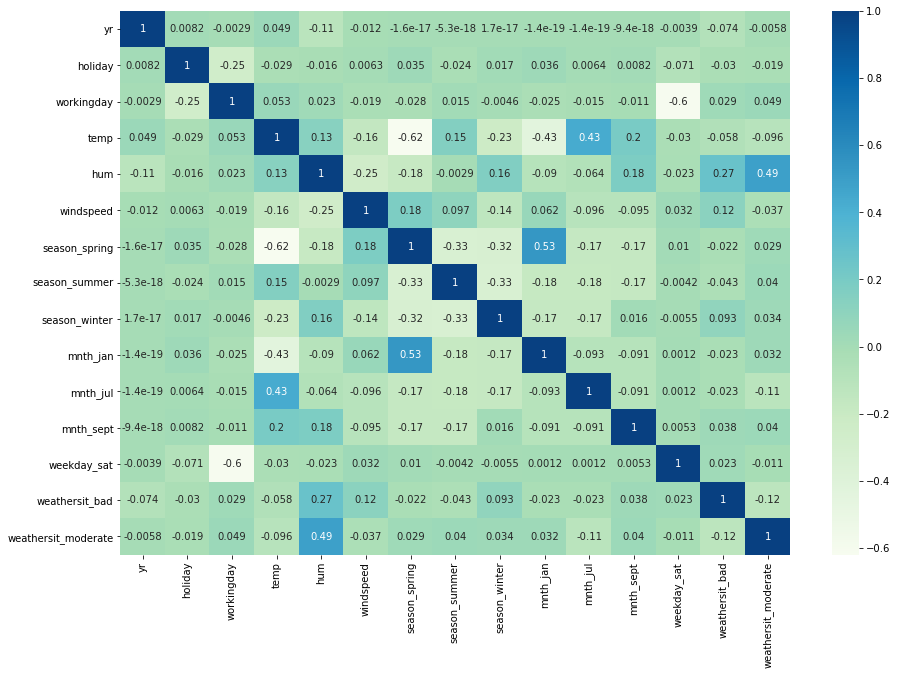

In [52]:
#plot graph based on the model
plt.figure(figsize = (15,10))
sns.heatmap(bS_dataframe[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [53]:
#model 2
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          3.59e-184
Time:                        21:38:58   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

In [54]:
# Dropping the column hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.46e-181
Time:                        21:40:03   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

In [55]:
#dropping holiday and checking
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          4.56e-182
Time:                        21:40:35   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

In [56]:
#dropping july column
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.57e-182
Time:                        21:41:18   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

In [57]:
#dropping temp
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.84e-150
Time:                        21:41:39   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

In [58]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.93e-97
Time:                        21:41:54   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

In [59]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.93e-97
Time:                        21:42:10   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

In [60]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          5.90e-146
Time:                        21:42:26   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

In [61]:
#using instead of saturday
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.32e-145
Time:                        21:42:48   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

In [62]:
#adding temp and removed season and working day
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.33e-179
Time:                        21:43:24   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

In [63]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [64]:
#final model
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.311114143623 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


In [65]:
y_train_pred = lr.predict(X_train[cols])


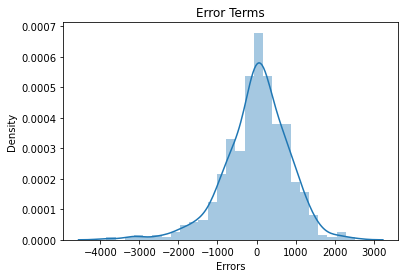

In [67]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
plot_res_dist(y_train, y_train_pred)


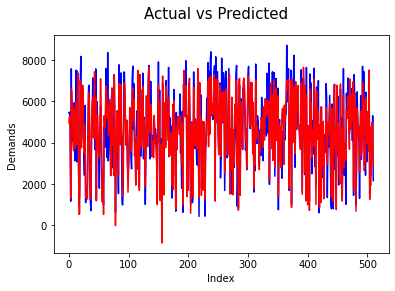

In [68]:
#check actual vs predicted
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [69]:
r2_score(y_train,y_train_pred)


0.8185359364498817

In [70]:
#predict values for test data
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [71]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [72]:
r2_score(y_test,y_test_pred)


0.8159036088393238

In [73]:
#actual vs predicted
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

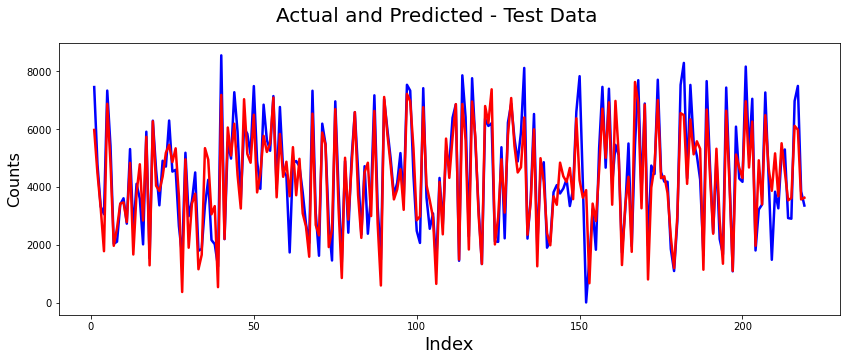

In [74]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')


In [75]:
#get errors
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

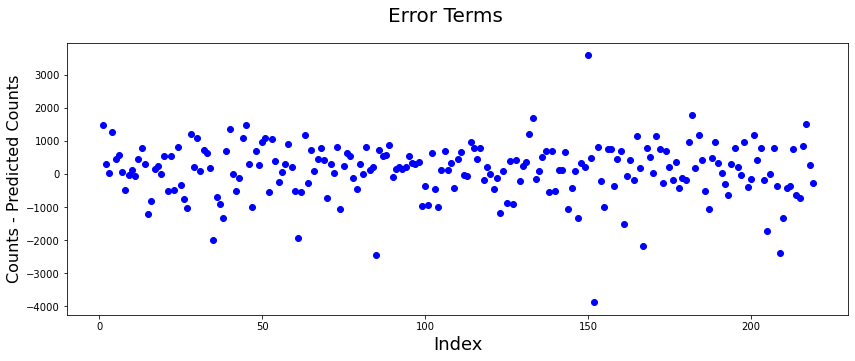

In [76]:
plot_err_terms(y_test,y_test_pred)


In [78]:
# errors are randomly distributed
bS_dataframe.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [79]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.33e-179
Time:                        21:50:55   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    